<a href="https://colab.research.google.com/github/yranabe23-svg/ai-bootcamp/blob/main/Image_Recognition_5Days_Bootcamp_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day** 01

What is Image Recognition?

What is Deep Learning?

What is a Dataset?

Why Preprocessing?

What is EDA (Exploratory Data Analysis)?

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"yogita15951","key":"76f58f8fd6f7e522a9904f1c565bf25f"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [7]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


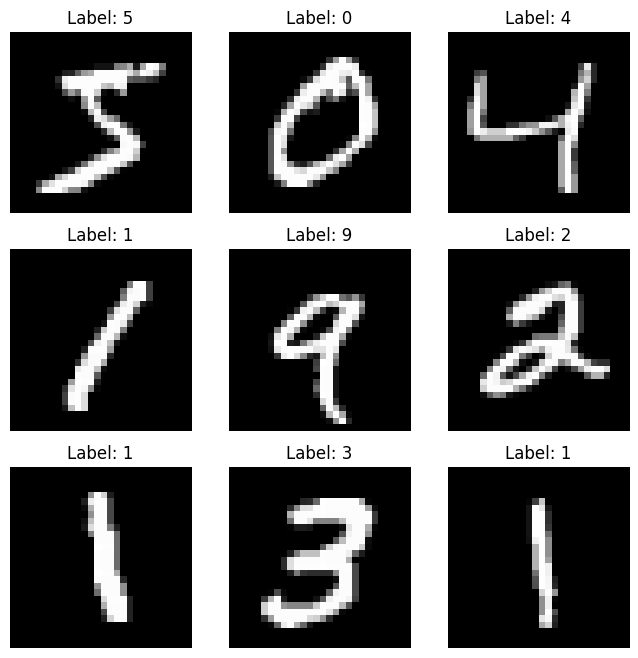

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [10]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


# DAY **02**

**What is a Convolutional Neural Network (CNN)?**


**How does model training work?**


**Why do we use Dropout?**


**How to evaluate a model?**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9005 - loss: 0.3281 - val_accuracy: 0.9845 - val_loss: 0.0540
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 27ms/step - accuracy: 0.9853 - loss: 0.0465 - val_accuracy: 0.9868 - val_loss: 0.0461
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.9865 - val_loss: 0.0440
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9875 - val_loss: 0.0452
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9945 - loss: 0.0160 - val_accuracy: 0.9894 - val_loss: 0.0398


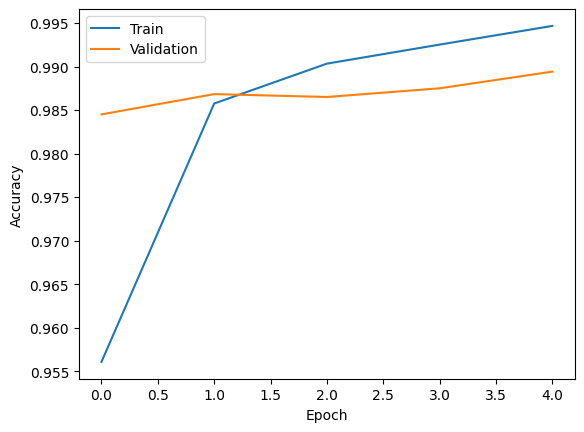

In [13]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9885 - loss: 0.0367
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [15]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Day **03**

Why deeper CNNs?

What is Data Augmentation?

What is Advanced Evaluation Metrics?

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

In [17]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(X_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 77ms/step - accuracy: 0.3494 - loss: 1.7662 - val_accuracy: 0.4668 - val_loss: 1.5633
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.5335 - loss: 1.3125 - val_accuracy: 0.6004 - val_loss: 1.1719
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.5767 - loss: 1.1849 - val_accuracy: 0.5666 - val_loss: 1.2514
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.6107 - loss: 1.1121 - val_accuracy: 0.6421 - val_loss: 1.0160
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6286 - loss: 1.0677 - val_accuracy: 0.5697 - val_loss: 1.2468
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6486 - loss: 1.0206 - val_accuracy: 0.6625 - val_loss: 0.9927
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.6597 - loss: 0.9817 - val_accuracy: 0.6343 - val_loss: 1.0666
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6650 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.84      0.90      0.87      1000
           2       0.70      0.54      0.61      1000
           3       0.55      0.46      0.50      1000
           4       0.71      0.67      0.69      1000
           5       0.69      0.59      0.64      1000
           6       0.60      0.92      0.73      1000
           7       0.81      0.74      0.77      1000
           8       0.75      0.87      0.81      1000
           9       0.89      0.75      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



<function matplotlib.pyplot.show(close=None, block=None)>

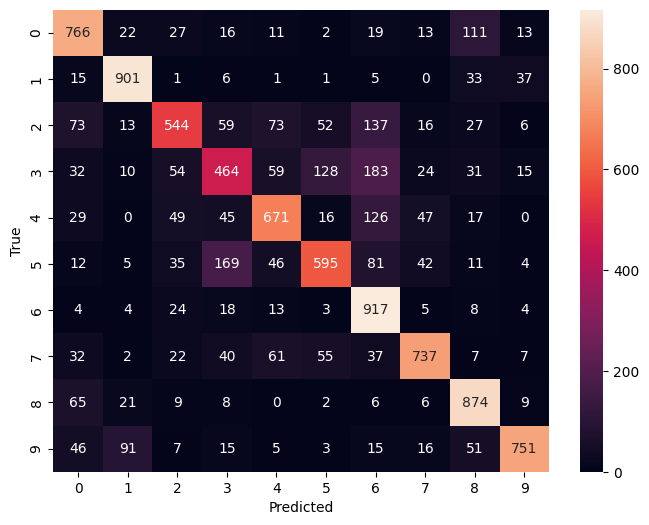

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

# DAY **04**

What are pre-trained model?
MobileNetV2 , ResNet ,VGG ,ImageNet

What is Transfer Learning?

How to Fine-Tune and Optimize?

How to Deploy a Model?

In [19]:
!kaggle datasets download -d tongpython/cat-and-dog

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
# Step 1: Upload the zip file from your computer
from google.colab import files
uploaded = files.upload()  # Choose your cat-and-dog.zip file

# Step 2: Extract the uploaded file
import zipfile

with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

# Step 3: Verify extraction
import os
print(os.listdir('/content/dogs-vs-cats'))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

In [ ]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=3, validation_data=val_generator)

In [ ]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

In [ ]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)

roc_auc=auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()